This notebook analyzes replicate 1 for the cell-fitness assay for KCNE1. 
The sort was done 

The sequencing project was 7704

In [3]:
cd /scratch2/glazeram/7704-AG/

In [4]:
setwd("/scratch2/glazeram/7704-AG/")
library(data.table)
library(dplyr)
library(ggplot2)
library(tidyr)
library(RColorBrewer)
library(gplots)
library(colorspace)
library("ggpubr")
library("gridExtra")
library("GGally")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”

Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [5]:
ls

7704-AG-7_S1_L005_R1_001.fastq.gz    out_rep1_time1_counted.txt
7704-AG-7_S1_L005_R2_001.fastq.gz    out_rep1_time1.txt
7704-AG-8_S1_L005_R1_001.fastq.gz    out_rep1_time2_counted.txt
7704-AG-8_S1_L005_R2_001.fastq.gz    out_rep1_time2.txt
7704-AG-9_S1_L005_R1_001.fastq.gz    out_rep1_time3_counted.txt
7704-AG-9_S1_L005_R2_001.fastq.gz    out_rep1_time3.txt
7704-AG_project_summary.xlsx         R1_eval_7704.py
counter.tmp                          readcounter.sh
fitness_v1.pdf                       rep1_time1.txt
funcscores-rep1-norm-2022-05-03.txt  rep1_time2.txt
manual_read.txt                      rep1_time3.txt
outputtest.txt                       test.txt


In [7]:
gunzip -c 7704-AG-7_S1_L005_R2_001.fastq.gz | head -25

@A01177:39:HFNWYDSX3:4:1101:1163:1000 2:N:0:GGACCAACAG+NGGGGGGGGG
CGGCAATTCCGGACGTACGCTTAAGTGTCCGTTGACGGTGGCTGACGTCCTCTAGACGGCCATCTCAGCGCTCGAGCCGGCTTGTCGACGACGGCGGTCTCAGTGGTGTACGGTACAAACCGCCACCATGGTGTCTAAGGGCGAAGAAGAT
+
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFFFFFFFFF:FFFFFFF:FFFF:FFFFFFFFFFFFFF:FFFFFFFFFFFFFFFFFFFFFFFFFF:FFFFFFFFFFF,FFFF,FF,FFFFFFF,:FFFFF
@A01177:39:HFNWYDSX3:4:1101:1398:1000 2:N:0:GGACCAACAG+NGGGGGGGGG
CGGCAATTCCGGACGTACGCTTAAGGTCGCTGCGGAAGATAAGGACGTCCTCTAGACGGCCATCTCAGCGCTCGAGCCGGCTTGTCGACGACGGCGGTCTCAGTGGTGTACGGTACAAACCGCCACCATGGTGTCTAAGGGCGAAGAAGAT
+
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFFFFFFFFFFFFFFFFFFFF:FFFFFFFFFFF:FF:
@A01177:39:HFNWYDSX3:4:1101:1542:1000 2:N:0:GGACCAACAG+NGGGGGGGGG
CGGCAATTCCGGACGTACGCTTAAGCAGATTAGGACTTGATTAGACGTCCTCTAGACGGCCATCTCAGCGCTCGAGCCGGCTTGTCGACGACGGCGGTCTCAGTGGTGTACGGTACAAACCGCCACCATGGTGTCTAAGGGCGAAGAAGAT
+
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFF

Pull out R2 and the barcode begins at character 25

The following should not be run (they have been run once) 

    cp /scratch2/muhama1/7082-AM/R1_eval_v1.py .
    
    gunzip -c 7704-AG-7_S1_L005_R2_001.fastq.gz | sed -n '2~4p' > rep1_time1.txt
    gunzip -c 7704-AG-8_S1_L005_R2_001.fastq.gz | sed -n '2~4p' > rep1_time2.txt
    gunzip -c 7704-AG-9_S1_L005_R2_001.fastq.gz | sed -n '2~4p' > rep1_time3.txt
    
    wc -l rep1_time1.txt 
    251110827 rep1_time1.txt

    wc -l rep1_time2.txt 
    176835058 rep1_time2.txt
    
    wc -l rep1_time3.txt 
    170763495 rep1_time3.txt

Next, run the R1_eval_v1.py script on the whole thing 

In [9]:
mv R1_eval_v1.py R1_eval_7704.py

these need to be run one too:
    
    ./R1_eval_7704.py rep1_time1.txt out_rep1_time1.txt
    ('Total reads analyzed', 251110827)
    ('Good barcode prefix (%of total reads)', 234531316, 93)
    ('Good barcode suffix (% of good prefix, % of total reads)', 230102097, 98, 91)
    
    ./R1_eval_7704.py rep1_time2.txt out_rep1_time2.txt
    ('Total reads analyzed', 176835058)
    ('Good barcode prefix (%of total reads)', 167465924, 94)
    ('Good barcode suffix (% of good prefix, % of total reads)', 163991131, 97, 92)
    
    ./R1_eval_7704.py rep1_time3.txt out_rep1_time3.txt
    ('Total reads analyzed', 170763495)
    ('Good barcode prefix (%of total reads)', 161276130, 94)
    ('Good barcode suffix (% of good prefix, % of total reads)', 158010759, 97, 92)

Unlike the first cell fitness assay (Ouabain_experiment_replicate1), created a counter instead 

    ./readcounter.sh out_rep1_time1.txt out_rep1_time1_counted.txt

    ./readcounter.sh out_rep1_time2.txt out_rep1_time2_counted.txt
    
    

In [7]:
# Switch to R

time1 <- fread("out_rep1_time1_counted.txt", header=F, stringsAsFactors = F)
time2 <- fread("out_rep1_time2_counted.txt", header=F, stringsAsFactors = F)
time3 <- fread("out_rep1_time3_counted.txt", header=F, stringsAsFactors = F)

head(time1)
head(time2)

V1,V2
<chr>,<int>
GGTTGTGGAAGTGGTGCG,2
GCATTTGGAGGGTCCCCT,1
TGGGAGGAAGGCGTCAAA,1
GGGGGGGGGGTTAGTTGG,1
CATGTCCAGTAGTGGCAA,1
GGTCCGTTGGGCGCTCCA,8


V1,V2
<chr>,<int>
CGGTTATCGAGGCTAAAG,1
CCTTAGACCGCGACGGTG,1
GGTTGTGGAAGTGGTGCG,1
AATGCATGAGGCTGGTAG,1
GGTCCGTTGGGCGCTCCA,12
CCATGATTTCTGTGTTCG,1295


In [8]:
head(time3)

V1,V2
<chr>,<int>
GACGATGACAGCACTTCG,1
ATATGAAAGGTGCAACGT,1
ATTGCGGCTTCTGGGTGT,1
CAGCCCCGCGCGGGGGTC,1
GGTTGTGGAAGTGGTGCG,2
TGTGTATAGGGATGAACC,1


In [9]:
library(dplyr)

In [10]:
all_times <- full_join(time1,time2,by="V1") %>% full_join(.,time3, by="V1")

head(all_times)

V1,V2.x,V2.y,V2
<chr>,<int>,<int>,<int>
GGTTGTGGAAGTGGTGCG,2,1,2
GCATTTGGAGGGTCCCCT,1,NA,NA
TGGGAGGAAGGCGTCAAA,1,NA,NA
GGGGGGGGGGTTAGTTGG,1,NA,NA
CATGTCCAGTAGTGGCAA,1,NA,1
GGTCCGTTGGGCGCTCCA,8,12,6


In [11]:
sub <- fread("/scratch2/muhama1/test_5013_subA/valid_barcodes_withIDs_wCounts.txt", header=T, 
             stringsAsFactors=F) %>% mutate(barcodeID = paste("barcode",id,sep=""))
sub2 <- fread("/scratch2/muhama1/test_5013_subA/full_bpanalyses.txt", header=T, stringsAsFactors = F)

head(sub)

head(sub2)

Count_4564,barcode,Count_5013,totalCount,id,barcodeID
<int>,<chr>,<int>,<int>,<int>,<chr>
1775,AAAAAAAACACTCCGATA,2404,4179,1,barcode1
1849,AAAAAAAACGAACGCAGT,2329,4178,2,barcode2
332,AAAAAAAAGAATCTAATT,602,934,3,barcode3
2302,AAAAAAAATTTCGAATAG,2985,5287,4,barcode4
2097,AAAAAAACACGGCTAAGC,2665,4762,5,barcode5
13,AAAAAAACCATGTTATTT,38,51,6,barcode6


barcodeID,mutation,refCodon,altCodon,category
<chr>,<chr>,<chr>,<chr>,<chr>
barcode100000,goodMut_G69R,GGC,AGG,weird
barcode100001,goodMut_E52R,GAG,CGT,weird
barcode100002,goodMut_F62Q,TTC,CAG,weird
barcode100003,goodMut_L68A,CTG,GCG,weird
barcode100004,goodMut_F63E,TTC,GAG,weird
barcode100005,goodMut_N84I,AAC,ATT,weird


In [12]:
subA <- full_join(sub,sub2)

head(subA)

Joining, by = "barcodeID"



Count_4564,barcode,Count_5013,totalCount,id,barcodeID,mutation,refCodon,altCodon,category
<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1775,AAAAAAAACACTCCGATA,2404,4179,1,barcode1,goodMut_R45F,CGC,TTT,weird
1849,AAAAAAAACGAACGCAGT,2329,4178,2,barcode2,goodMut_R107L,CGG,CTG,transversion
332,AAAAAAAAGAATCTAATT,602,934,3,barcode3,NA,NA,NA,NA
2302,AAAAAAAATTTCGAATAG,2985,5287,4,barcode4,goodMut_A31F,GCC,TTT,weird
2097,AAAAAAACACGGCTAAGC,2665,4762,5,barcode5,goodMut_A31S,GCC,AGT,weird
13,AAAAAAACCATGTTATTT,38,51,6,barcode6,goodMut_P132T,CCT,ACG,weird


In [13]:
colnames(all_times)=c("bc","time1","time2","time3")
head(all_times)

bc,time1,time2,time3
<chr>,<int>,<int>,<int>
GGTTGTGGAAGTGGTGCG,2,1,2
GCATTTGGAGGGTCCCCT,1,NA,NA
TGGGAGGAAGGCGTCAAA,1,NA,NA
GGGGGGGGGGTTAGTTGG,1,NA,NA
CATGTCCAGTAGTGGCAA,1,NA,1
GGTCCGTTGGGCGCTCCA,8,12,6


In [14]:
head(subA)

Count_4564,barcode,Count_5013,totalCount,id,barcodeID,mutation,refCodon,altCodon,category
<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1775,AAAAAAAACACTCCGATA,2404,4179,1,barcode1,goodMut_R45F,CGC,TTT,weird
1849,AAAAAAAACGAACGCAGT,2329,4178,2,barcode2,goodMut_R107L,CGG,CTG,transversion
332,AAAAAAAAGAATCTAATT,602,934,3,barcode3,NA,NA,NA,NA
2302,AAAAAAAATTTCGAATAG,2985,5287,4,barcode4,goodMut_A31F,GCC,TTT,weird
2097,AAAAAAACACGGCTAAGC,2665,4762,5,barcode5,goodMut_A31S,GCC,AGT,weird
13,AAAAAAACCATGTTATTT,38,51,6,barcode6,goodMut_P132T,CCT,ACG,weird


In [15]:
colnames(subA)[2]="bc"

df1 <- inner_join(all_times,subA) %>% select(bc, time1, time2, time3, Count_4564, Count_5013, totalCount, mutation) %>% 
    separate(mutation, c(NA,"mut"),sep="_")

head(df1)

Joining, by = "bc"



bc,time1,time2,time3,Count_4564,Count_5013,totalCount,mut
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
CCATGATTTCTGTGTTCG,5,1295,650,1978,2603,4581,K135V
CAAATGCCAATTACGCAT,599,1524,188,1133,1300,2433,NA
GTCTATGCCGCAAGGGTT,4775,1407,2345,5394,4227,9621,NA
TCCGAGCCCAGAAGTAAA,810,1032,3177,603,351,954,R45H
CCGCCATGGGGGTATCGC,1164,395,6,522,706,1228,NA
ACTTTAACACGAAGCGTG,3,698,5,529,602,1131,S83F


In [16]:
head(df1)

bc,time1,time2,time3,Count_4564,Count_5013,totalCount,mut
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
CCATGATTTCTGTGTTCG,5,1295,650,1978,2603,4581,K135V
CAAATGCCAATTACGCAT,599,1524,188,1133,1300,2433,NA
GTCTATGCCGCAAGGGTT,4775,1407,2345,5394,4227,9621,NA
TCCGAGCCCAGAAGTAAA,810,1032,3177,603,351,954,R45H
CCGCCATGGGGGTATCGC,1164,395,6,522,706,1228,NA
ACTTTAACACGAAGCGTG,3,698,5,529,602,1131,S83F


In [17]:
sum(is.na(df1$mut))
nrow(df1)

[1] 57246

[1] 131579

In [18]:
df1$time1.adj = 1e6 * (df1$time1/(sum(df1$time1, na.rm = T)))

df1$time2.adj = 1e6 * (df1$time2/(sum(df1$time2, na.rm = T)))

df1$time3.adj = 1e6 * (df1$time3/(sum(df1$time3, na.rm = T)))

df1$tot.adj = 1e6 * (df1$totalCount/(sum(df1$totalCount, na.rm = T)))

head(df1)

bc,time1,time2,time3,Count_4564,Count_5013,totalCount,mut,time1.adj,time2.adj,time3.adj,tot.adj
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
CCATGATTTCTGTGTTCG,5,1295,650,1978,2603,4581,K135V,0.02281612,8.295318,4.33435601,11.731538
CAAATGCCAATTACGCAT,599,1524,188,1133,1300,2433,NA,2.73337097,9.762213,1.25362912,6.230699
GTCTATGCCGCAAGGGTT,4775,1407,2345,5394,4227,9621,NA,21.78939295,9.012751,15.63702284,24.638535
TCCGAGCCCAGAAGTAAA,810,1032,3177,603,351,954,R45H,3.69621116,6.610632,21.18499853,2.443110
CCGCCATGGGGGTATCGC,1164,395,6,522,706,1228,NA,5.31159233,2.530232,0.04000944,3.144800
ACTTTAACACGAAGCGTG,3,698,5,529,602,1131,S83F,0.01368967,4.471145,0.03334120,2.896392


In [19]:
num1 <- aggregate(time1.adj~mut, data=df1, FUN=sum)
num2 <- aggregate(time2.adj~mut, data=df1, FUN=sum)
num3 <- aggregate(time3.adj~mut, data=df1, FUN=sum)
num4 <- aggregate(tot.adj~mut, data=df1, FUN=sum)

head(num1)

,mut,time1.adj
,<chr>,<dbl>
1,A102A,267.19956
2,A102C,110.51671
3,A102D,156.62353
4,A102E,82.02395
5,A102F,655.88583
6,A102G,454.71611


In [20]:
df2 <- full_join(num1, num2) %>% full_join(.,num3) %>% full_join(.,num4)

Joining, by = "mut"

Joining, by = "mut"

Joining, by = "mut"



In [21]:
head(df2)

,mut,time1.adj,time2.adj,time3.adj,tot.adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,A102A,267.19956,219.56651,251.5860,411.8100
2,A102C,110.51671,189.94037,164.6789,180.5289
3,A102D,156.62353,258.35273,211.7833,190.8212
4,A102E,82.02395,81.96031,178.0153,134.5759
5,A102F,655.88583,338.09668,375.2285,336.1632
6,A102G,454.71611,409.61578,591.6196,475.3155


In [22]:
df2$mutation = df2$mut
df2 <- separate(df2,mut,c("orig","pos","new"),sep=c(1,-1),convert=T)

head(df2)

,orig,pos,new,time1.adj,time2.adj,time3.adj,tot.adj,mutation
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,A,102,A,267.19956,219.56651,251.5860,411.8100,A102A
2,A,102,C,110.51671,189.94037,164.6789,180.5289,A102C
3,A,102,D,156.62353,258.35273,211.7833,190.8212,A102D
4,A,102,E,82.02395,81.96031,178.0153,134.5759,A102E
5,A,102,F,655.88583,338.09668,375.2285,336.1632,A102F
6,A,102,G,454.71611,409.61578,591.6196,475.3155,A102G


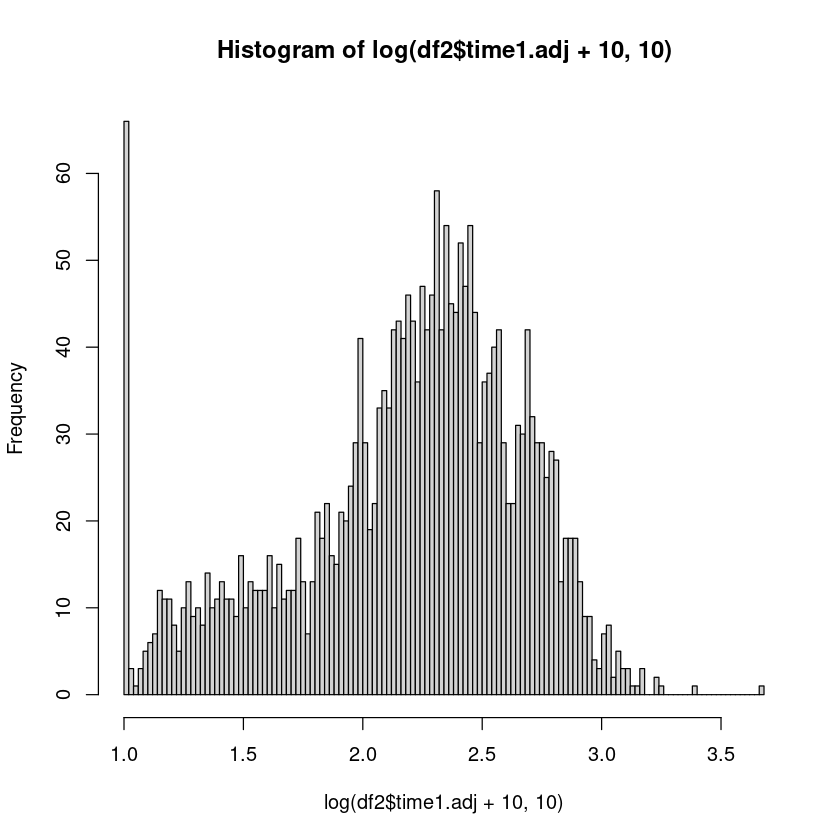

In [23]:
hist(log(df2$time1.adj+10,10), breaks=100)

In [24]:
df2$cat = ifelse(df2$orig==df2$new,"syn",ifelse(df2$new =="X", "ns","ms")) 

df2$cat = ifelse(df2$cat =="ns" & df2$pos <66, "earlyns",df2$cat)

df2$cat = ifelse(df2$cat =="ns" & df2$pos >65, "latens",df2$cat)

In [25]:
df2$score.time1.total = log((df2$time1.adj+10)/(df2$tot.adj+10),2)

df2$score.time2.total = log((df2$time2.adj+10)/(df2$tot.adj+10),2)

df2$score.time3.total = log((df2$time3.adj+10)/(df2$tot.adj+10),2)

In [26]:
head(df2)

,orig,pos,new,time1.adj,time2.adj,time3.adj,tot.adj,mutation,cat,score.time1.total,score.time2.total,score.time3.total
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,A,102,A,267.19956,219.56651,251.5860,411.8100,A102A,syn,-0.60566842,-0.877681200,-0.6893079
2,A,102,C,110.51671,189.94037,164.6789,180.5289,A102C,ms,-0.66077688,0.069559697,-0.1253051
3,A,102,D,156.62353,258.35273,211.7833,190.8212,A102D,ms,-0.26931977,0.418218681,0.1432389
4,A,102,E,82.02395,81.96031,178.0153,134.5759,A102E,ms,-0.65174617,-0.652744168,0.3790230
5,A,102,F,655.88583,338.09668,375.2285,336.1632,A102F,ms,0.94382228,0.008035509,0.1542620
6,A,102,G,454.71611,409.61578,591.6196,475.3155,A102G,ms,-0.06257335,-0.209854084,0.3099285


Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”


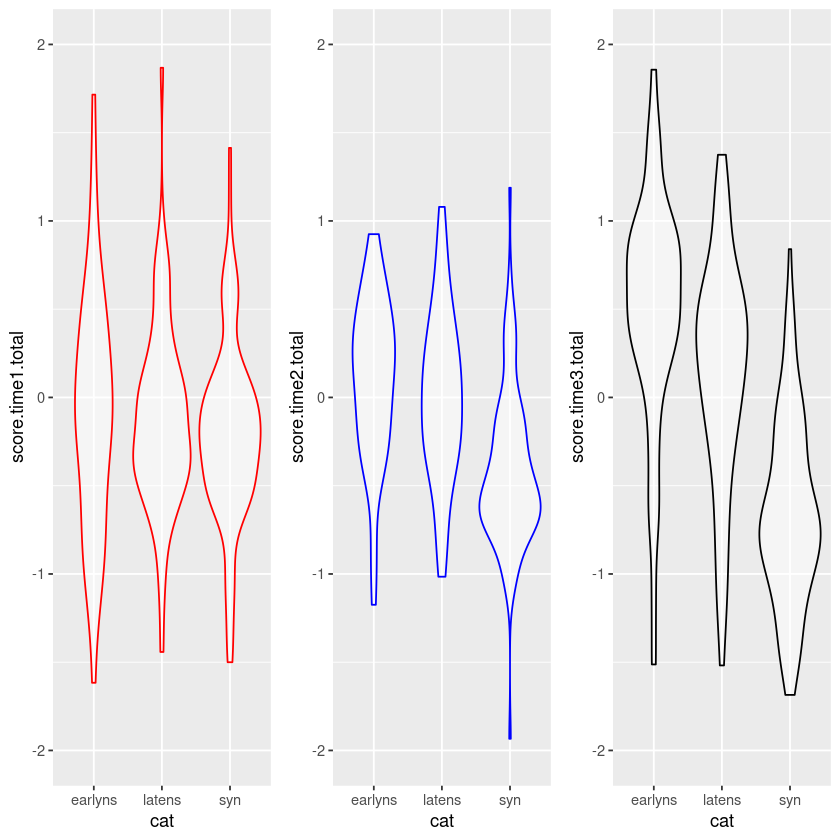

In [27]:
p1 <- ggplot(df2[df2$cat!="ms",], aes(cat,score.time1.total))+geom_violin(col="red", alpha =0.5)+
    ylim(-2,2)

p2 <- ggplot(data=df2[df2$cat!="ms",], aes(cat,score.time2.total))+geom_violin(col="blue",alpha=0.5)+
    ylim(-2,2)
    
p3 <- ggplot(data=df2[df2$cat!="ms",], aes(cat,score.time3.total))+geom_violin(col="black",alpha=0.5)+
    ylim(-2,2)

ggarrange(p1,p2,p3,ncol=3)

In [28]:
head(df2)

,orig,pos,new,time1.adj,time2.adj,time3.adj,tot.adj,mutation,cat,score.time1.total,score.time2.total,score.time3.total
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,A,102,A,267.19956,219.56651,251.5860,411.8100,A102A,syn,-0.60566842,-0.877681200,-0.6893079
2,A,102,C,110.51671,189.94037,164.6789,180.5289,A102C,ms,-0.66077688,0.069559697,-0.1253051
3,A,102,D,156.62353,258.35273,211.7833,190.8212,A102D,ms,-0.26931977,0.418218681,0.1432389
4,A,102,E,82.02395,81.96031,178.0153,134.5759,A102E,ms,-0.65174617,-0.652744168,0.3790230
5,A,102,F,655.88583,338.09668,375.2285,336.1632,A102F,ms,0.94382228,0.008035509,0.1542620
6,A,102,G,454.71611,409.61578,591.6196,475.3155,A102G,ms,-0.06257335,-0.209854084,0.3099285


In [29]:
df3 <- df2[,c(8,10:12)]

head(df3)
#melt(df2, id.vars="mutation")

,mutation,score.time1.total,score.time2.total,score.time3.total
,<chr>,<dbl>,<dbl>,<dbl>
1,A102A,-0.60566842,-0.877681200,-0.6893079
2,A102C,-0.66077688,0.069559697,-0.1253051
3,A102D,-0.26931977,0.418218681,0.1432389
4,A102E,-0.65174617,-0.652744168,0.3790230
5,A102F,0.94382228,0.008035509,0.1542620
6,A102G,-0.06257335,-0.209854084,0.3099285


In [30]:
df4 <- melt(df3, id.vars="mutation")

Warning message in melt(df3, id.vars = "mutation"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(df3). In the next version, this warning will become an error.”


In [31]:
head(df4)
unique(df4$variable)

,mutation,variable,value
,<chr>,<fct>,<dbl>
1,A102A,score.time1.total,-0.60566842
2,A102C,score.time1.total,-0.66077688
3,A102D,score.time1.total,-0.26931977
4,A102E,score.time1.total,-0.65174617
5,A102F,score.time1.total,0.94382228
6,A102G,score.time1.total,-0.06257335


[1] score.time1.total score.time2.total score.time3.total
Levels: score.time1.total score.time2.total score.time3.total

In [32]:
map = df2[,c("mutation","cat")]
head(map)

,mutation,cat
,<chr>,<chr>
1,A102A,syn
2,A102C,ms
3,A102D,ms
4,A102E,ms
5,A102F,ms
6,A102G,ms


In [33]:
df5 <- left_join(df4,map,by="mutation")

Warning message:
“Removed 4 rows containing missing values (geom_point).”


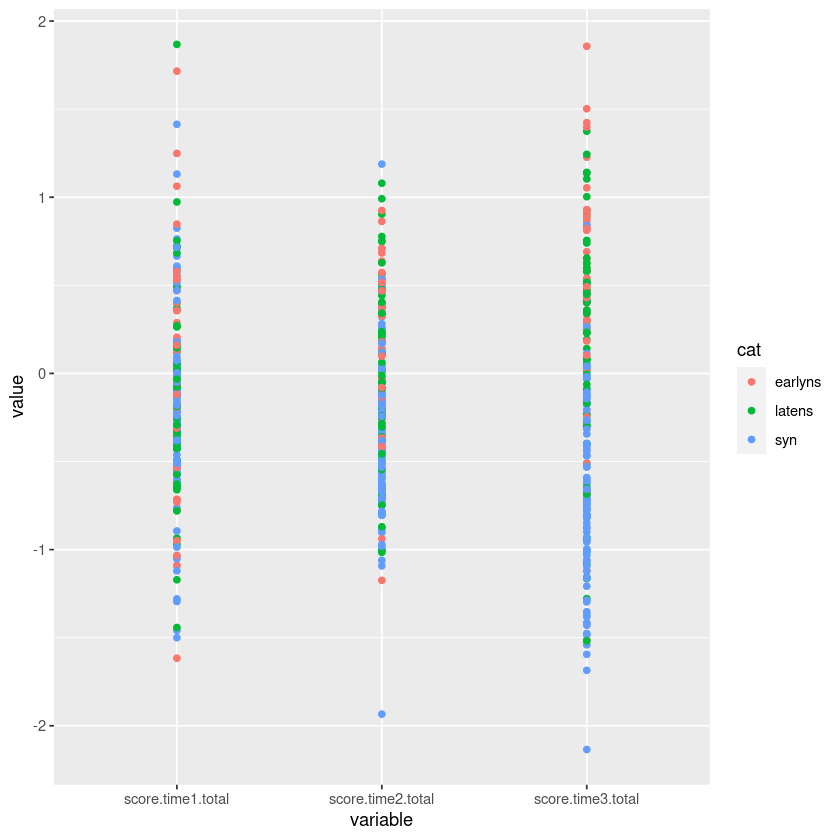

In [34]:
ggplot(df5[df5$cat !="ms",],aes(variable,value, col=cat))+geom_point()

In [35]:
head(df5)

,mutation,variable,value,cat
,<chr>,<fct>,<dbl>,<chr>
1,A102A,score.time1.total,-0.60566842,syn
2,A102C,score.time1.total,-0.66077688,ms
3,A102D,score.time1.total,-0.26931977,ms
4,A102E,score.time1.total,-0.65174617,ms
5,A102F,score.time1.total,0.94382228,ms
6,A102G,score.time1.total,-0.06257335,ms


In [36]:
num1 <- aggregate(value~cat+variable,data=df5,FUN=median)
#(time1.adj~mut, data=df1, FUN=sum)

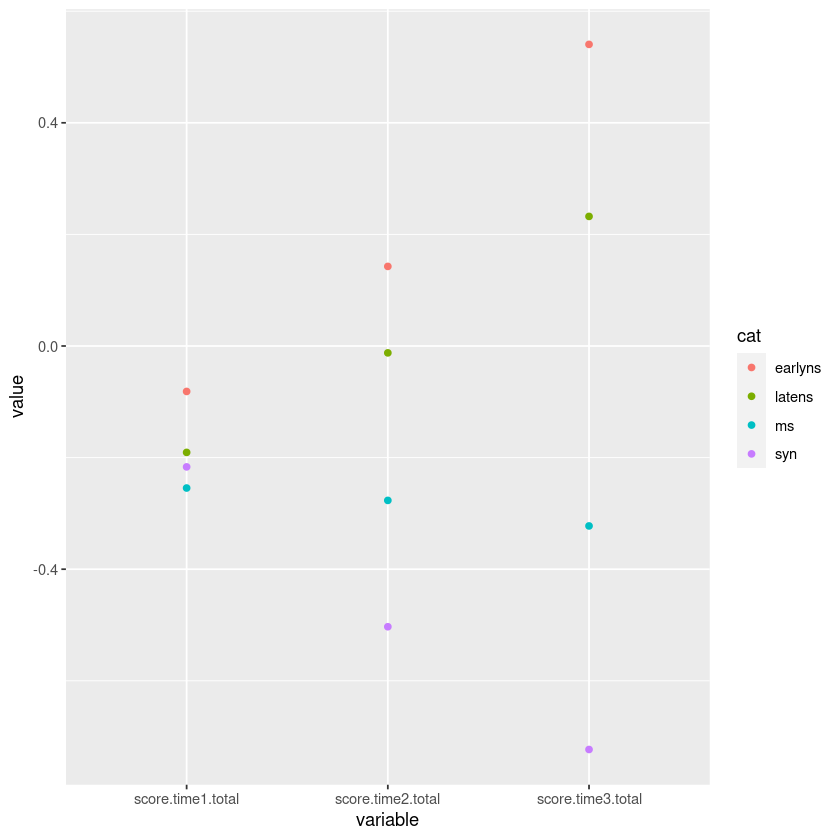

In [37]:
ggplot(num1,aes(variable,value,col=cat))+geom_point()

In [38]:
head(df1)

bc,time1,time2,time3,Count_4564,Count_5013,totalCount,mut,time1.adj,time2.adj,time3.adj,tot.adj
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
CCATGATTTCTGTGTTCG,5,1295,650,1978,2603,4581,K135V,0.02281612,8.295318,4.33435601,11.731538
CAAATGCCAATTACGCAT,599,1524,188,1133,1300,2433,NA,2.73337097,9.762213,1.25362912,6.230699
GTCTATGCCGCAAGGGTT,4775,1407,2345,5394,4227,9621,NA,21.78939295,9.012751,15.63702284,24.638535
TCCGAGCCCAGAAGTAAA,810,1032,3177,603,351,954,R45H,3.69621116,6.610632,21.18499853,2.443110
CCGCCATGGGGGTATCGC,1164,395,6,522,706,1228,NA,5.31159233,2.530232,0.04000944,3.144800
ACTTTAACACGAAGCGTG,3,698,5,529,602,1131,S83F,0.01368967,4.471145,0.03334120,2.896392


In [39]:
head(df2)

,orig,pos,new,time1.adj,time2.adj,time3.adj,tot.adj,mutation,cat,score.time1.total,score.time2.total,score.time3.total
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,A,102,A,267.19956,219.56651,251.5860,411.8100,A102A,syn,-0.60566842,-0.877681200,-0.6893079
2,A,102,C,110.51671,189.94037,164.6789,180.5289,A102C,ms,-0.66077688,0.069559697,-0.1253051
3,A,102,D,156.62353,258.35273,211.7833,190.8212,A102D,ms,-0.26931977,0.418218681,0.1432389
4,A,102,E,82.02395,81.96031,178.0153,134.5759,A102E,ms,-0.65174617,-0.652744168,0.3790230
5,A,102,F,655.88583,338.09668,375.2285,336.1632,A102F,ms,0.94382228,0.008035509,0.1542620
6,A,102,G,454.71611,409.61578,591.6196,475.3155,A102G,ms,-0.06257335,-0.209854084,0.3099285


In [40]:
length(unique(df2$mutation))

[1] 2374

* Time 1 is 1 day beore removal of HMR 
* Time 2 is 4 days after removal of HMR
* Time 3 is 8 days after removal of HMR

Next step --> correcting position

In [41]:
df2$pos_corr = ifelse(df2$pos <35, df2$pos, df2$pos-9)

,cutoff,sdSyn,meanSyn,numSyn
,<dbl>,<dbl>,<dbl>,<dbl>
1,-2.0,0.5385471,-0.6668183,101
2,-1.5,0.5372590,-0.6733768,100
3,-1.0,0.5372590,-0.6733768,100
4,-0.5,0.5372590,-0.6733768,100
5,0.0,0.5372590,-0.6733768,100
6,0.5,0.5372590,-0.6733768,100
7,1.0,0.5284810,-0.6844801,99
8,1.5,0.5284810,-0.6844801,99
9,2.0,0.5284810,-0.6844801,98


Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


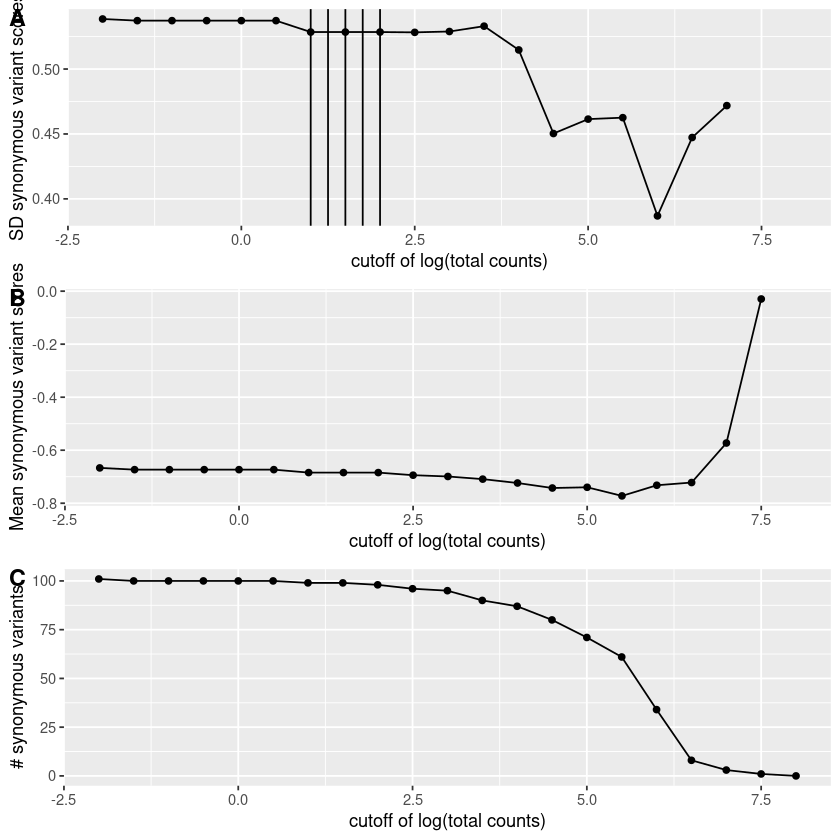

In [42]:
syn <- df2[df2$cat=="syn",]
f <- data.frame(cutoff=double(),sdSyn=double(), meanSyn=double(), numSyn=double())
for (x in seq(-2,8,0.5)){
    a <- syn[log(syn$tot.adj) > x,]
    f[nrow(f)+1,]=c(x,sd(a$score.time3.total,na.rm=T), mean(a$score.time3.total,na.rm=T),length(unique(a$pos)))
}

head(f,15)

p1 <- ggplot(f,aes(cutoff,sdSyn))+geom_point()+geom_line()+xlab("cutoff of log(total counts)")+
    ylab("SD synonymous variant scores")+geom_vline(xintercept = seq(1,2,0.25))


p2 <- ggplot(f,aes(cutoff,meanSyn))+geom_point()+geom_line()+xlab("cutoff of log(total counts)")+
    ylab("Mean synonymous variant scores")


p3 <- ggplot(f,aes(cutoff,numSyn))+geom_point()+geom_line()+xlab("cutoff of log(total counts)")+
    ylab("# synonymous variants")

ggarrange(p1,p2,p3,labels = c("A","B","C"), ncol=1, nrow=3)

In [43]:
scores <- df2[df2$tot.adj > 10^1,]

In [44]:
length(unique(scores$mutation))

[1] 2261

Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”


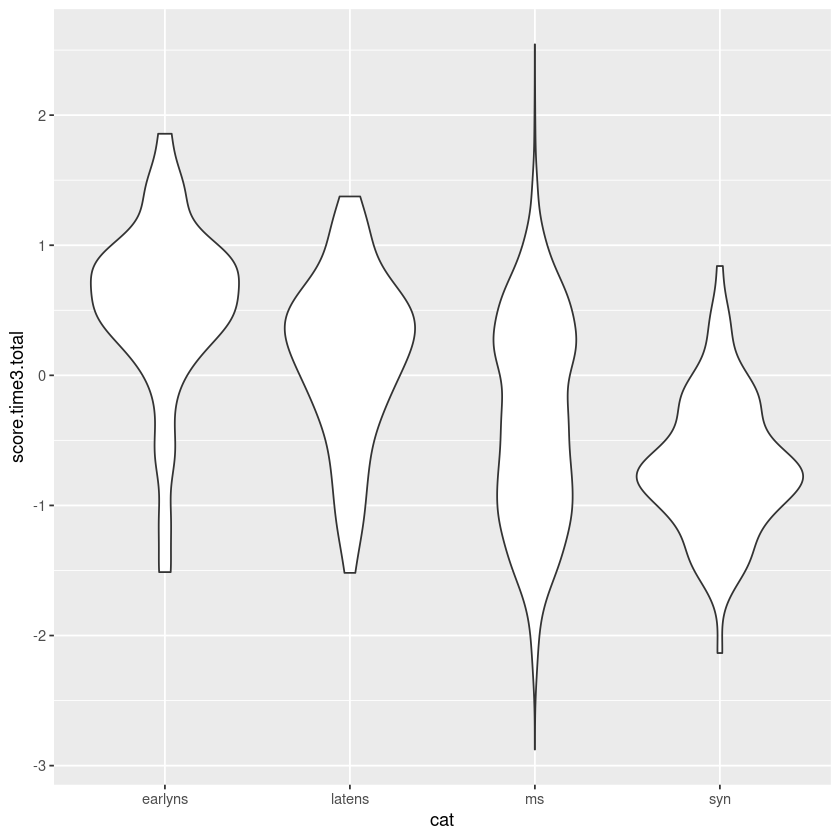

In [45]:
ggplot(scores,aes(cat,score.time3.total))+geom_violin()

In [46]:
### "normalization" of scores based on median of syn and median of early ns 

synMed = median(scores[scores$cat=="syn",12])

ensMed = median(scores[scores$cat=="earlyns",12])

scores$norm.ou = (scores$score.time3.total - ensMed)/(synMed - ensMed)

In [47]:
head(scores)

,orig,pos,new,time1.adj,time2.adj,time3.adj,tot.adj,mutation,cat,score.time1.total,score.time2.total,score.time3.total,pos_corr,norm.ou
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,102,A,267.19956,219.56651,251.5860,411.8100,A102A,syn,-0.60566842,-0.877681200,-0.6893079,93,0.9631843
2,A,102,C,110.51671,189.94037,164.6789,180.5289,A102C,ms,-0.66077688,0.069559697,-0.1253051,93,0.5384346
3,A,102,D,156.62353,258.35273,211.7833,190.8212,A102D,ms,-0.26931977,0.418218681,0.1432389,93,0.3361945
4,A,102,E,82.02395,81.96031,178.0153,134.5759,A102E,ms,-0.65174617,-0.652744168,0.3790230,93,0.1586258
5,A,102,F,655.88583,338.09668,375.2285,336.1632,A102F,ms,0.94382228,0.008035509,0.1542620,93,0.3278930
6,A,102,G,454.71611,409.61578,591.6196,475.3155,A102G,ms,-0.06257335,-0.209854084,0.3099285,93,0.2106607


In [48]:
length(unique(scores[scores$cat=="syn",8]))

length(unique(scores[scores$cat=="earlyns",8]))

length(unique(scores[scores$cat=="latens",8]))

length(unique(scores[scores$cat=="ms",8]))

[1] 96

[1] 38

[1] 65

[1] 2062

Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”


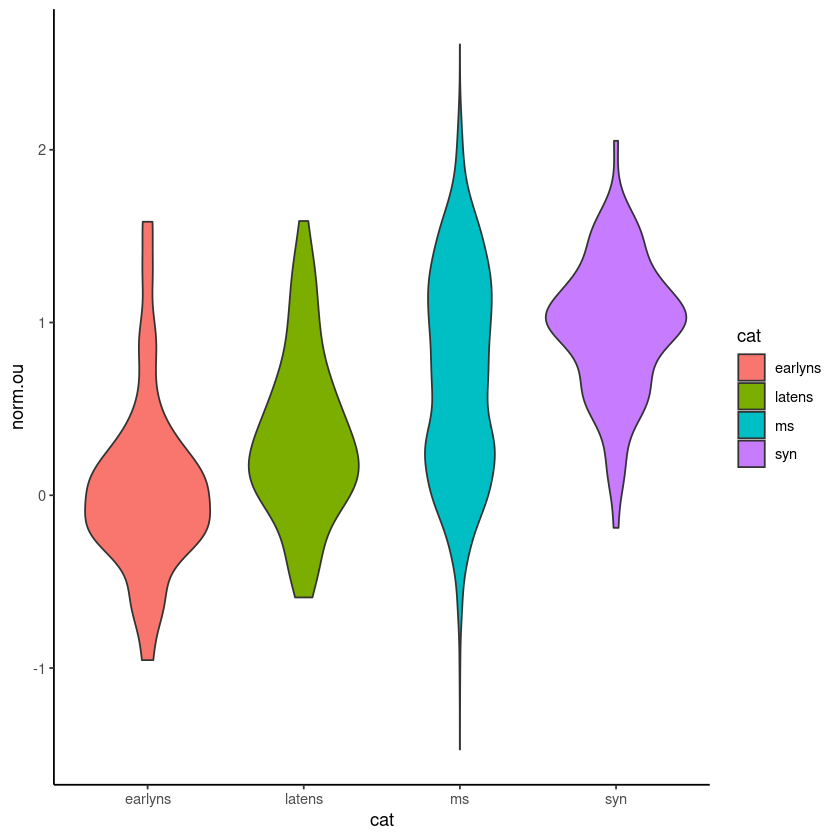

In [49]:
ggplot(scores,aes(cat,norm.ou, fill=cat))+geom_violin()+theme_classic()

Warning message:
“Removed 3 rows containing missing values (geom_point).”


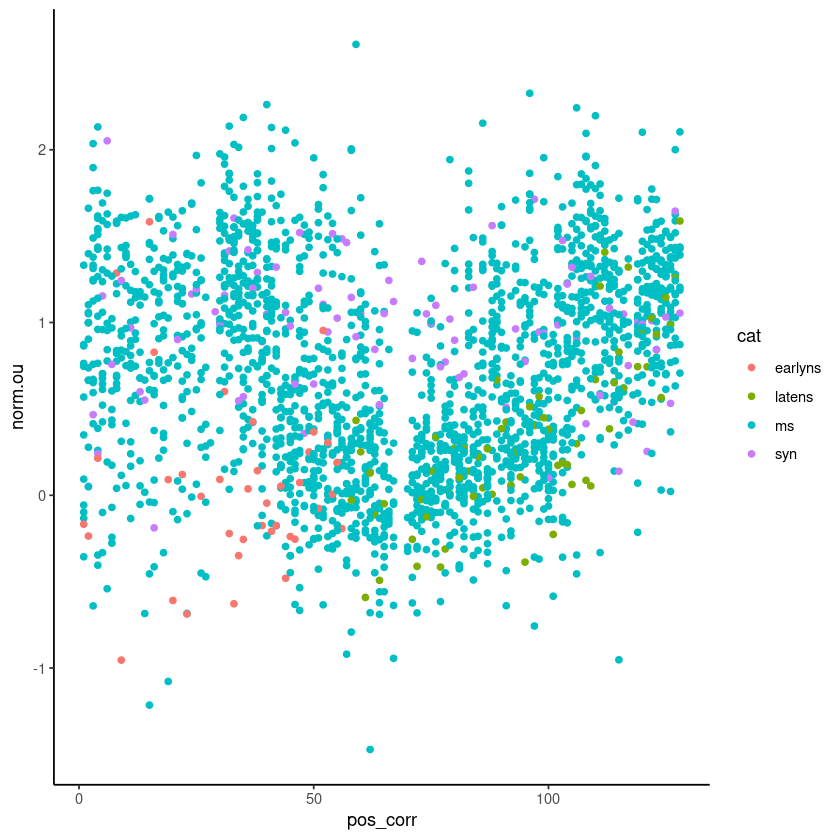

In [50]:
ggplot(scores,aes(pos_corr,norm.ou,col=cat))+geom_point()+theme_classic()

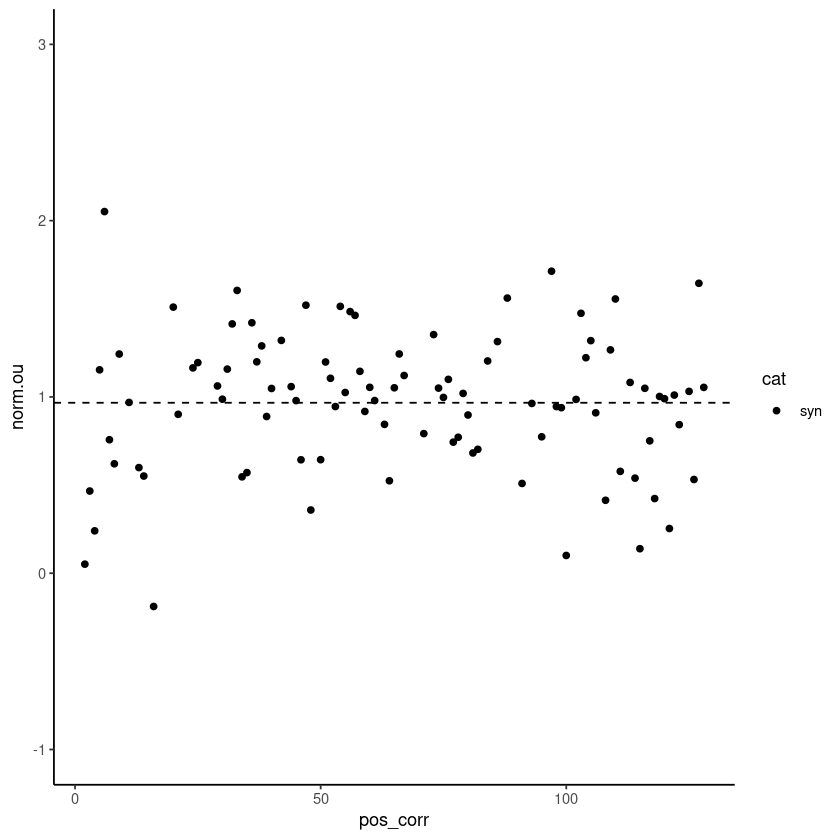

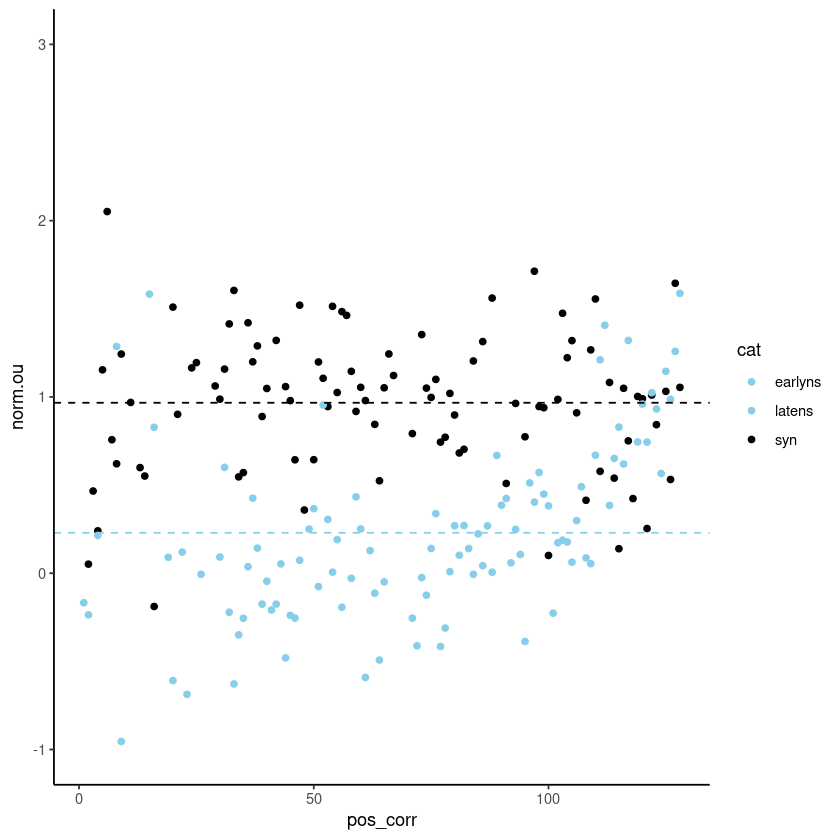

In [51]:
ggplot(scores[scores$cat=="syn",],aes(pos_corr,norm.ou,col=cat))+geom_point()+
    scale_color_manual(values=c("black"))+ylim(-1,3)+theme_classic()+
        geom_hline(yintercept = mean(scores[scores$cat=="syn",14]), lty=2)

ggplot(scores[scores$cat!="ms",],aes(pos_corr,norm.ou,col=cat))+geom_point()+
    scale_color_manual(values=c("skyblue","skyblue","black"))+ylim(-1,3)+theme_classic()+
        geom_hline(yintercept = mean(scores[scores$cat=="syn",14]), lty=2, col="black")+
        geom_hline(yintercept = mean(scores[scores$cat!="syn" & scores$cat!="ms",14]), lty=2, col="skyblue")


In [52]:
heatmap_matrix = matrix(ncol=21,nrow=128)
 colnames(heatmap_matrix)= c("G","A","V","L","M","I","F","Y","W","S","T","C","P","N","Q","K","R","H",
                 "D","E","X")

df3 <- scores
#head(heatmap_matrix)

for (i in c(1:128)){
    for (x1 in (1:21)){
      a = colnames(heatmap_matrix)[x1]
      scoreAA <- unlist(df3[df3$pos_corr==i & df3$new==a, 14])
      if(length(scoreAA)==0)
          {
          scoreAA = NA
      }
      #print(paste(i,a,scoreAA,sep=" "))
      #print(heatmap_matrix[i,x1])
      heatmap_matrix[i,x1] <- as.numeric(scoreAA)-1
      
    }
  }

In [53]:
head(heatmap_matrix)

G,A,V,L,M,I,F,Y,W,S,...,C,P,N,Q,K,R,H,D,E,X
-1.1331855,-0.254062487,-0.1358126,-0.1273472,NA,0.3317773,-0.65068719,NA,-1.09768202,NA,...,NA,-1.3561320,NA,NA,-0.4313731,-1.0567823,NA,-0.23653835,-0.90666814,-1.1676085
-0.2627089,-0.001489906,-0.7220700,0.6613810,-0.0009042954,-0.9486267,-0.09628253,NA,NA,-0.33448842,...,NA,-0.9507647,0.10267263,0.3984593,NA,-0.3339807,NA,0.05014051,0.05791623,-1.2360955
-0.3291629,0.378388643,0.3321908,-0.5337418,-1.6402707361,NA,0.31293011,0.48896148,0.12423611,1.03544939,...,NA,-0.2417295,0.76330549,-0.3348669,0.2481263,0.2407730,-0.5859825,-0.40579387,-0.34795385,NA
-0.7398876,0.602673251,0.2661918,1.1320928,0.0366659104,0.4367598,-0.03971673,-1.40500253,-1.34626449,-0.75962585,...,0.5342433,0.5431455,0.50937001,0.4254795,-0.2362711,0.7653521,0.4246534,0.61669848,-0.61253975,-0.7856269
-0.5752086,NA,0.3049238,0.5887513,-1.0997421118,-0.3229280,0.23645441,-0.04083532,0.05896977,-0.47838046,...,NA,NA,0.15377369,NA,-1.3323348,0.6919619,-0.3874131,-0.29799262,-0.29525160,NA
-0.8076684,0.380646027,NA,0.4247560,0.5673603752,NA,NA,0.28538180,-1.54099401,-0.00444596,...,NA,-0.1575357,-0.04611545,-0.2224941,0.6284399,0.7481821,NA,NA,NA,NA


In [54]:
library("RColorBrewer")

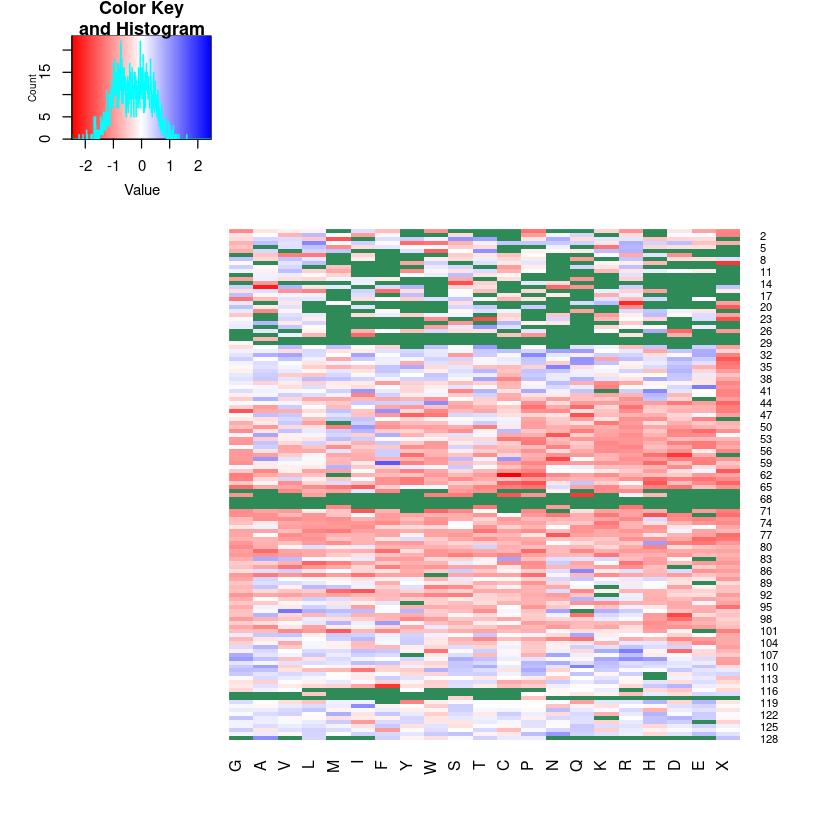

In [55]:

#my_palette <- colorRampPalette(c("red","pink","white","blue"))(n=200)

#my_palette = brewer.pal(1000,"RdBu")


my_palette = colorRampPalette(c("red","white","blue"))(n=500)

heatmap.2(heatmap_matrix, Rowv=NA, Colv=NA, 
         sepcolor="black",
          trace="none", dendrogram = c("none"),
       na.color = "seagreen", col = my_palette)



In [56]:
syn_Score <- (scores[scores$cat=="syn",])

In [57]:
head(syn_Score)
summary(syn_Score)

sd(syn_Score$norm.ou)

lower_thresh = as.numeric(quantile(syn_Score$norm.ou,c(0.025)))
upper_thresh = as.numeric(quantile(syn_Score$norm.ou,c(0.975)))

quantile(syn_Score$norm.ou,c(0.05,0.95))
quantile(syn_Score$norm.ou,c(0.01,0.99))

,orig,pos,new,time1.adj,time2.adj,time3.adj,tot.adj,mutation,cat,score.time1.total,score.time2.total,score.time3.total,pos_corr,norm.ou
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,102,A,267.19956,219.56651,251.58603,411.81003,A102A,syn,-0.6056684,-0.8776812,-0.6893079,93,0.9631843
22,A,106,A,264.52551,188.92187,104.11790,356.99883,A106A,syn,-0.4188352,-0.8835735,-1.6852504,97,1.7132273
43,A,123,A,1080.91817,837.50048,554.20410,605.91436,A123A,syn,0.8247412,0.4604844,-0.1265126,114,0.5393440
64,A,31,A,239.38671,227.27891,182.58308,361.51115,A31A,syn,-0.5750209,-0.6468216,-0.9479246,31,1.1579482
86,A,53,A,634.08274,519.50473,313.53398,559.53112,A53A,syn,0.1774714,-0.1051311,-0.8158574,44,1.0584886
107,A,8,A,16.82461,20.94007,10.21574,13.78795,A8A,syn,0.1733260,0.3792457,-0.2347517,8,0.6208587


     orig                pos             new              time1.adj       
 Length:96          Min.   :  2.00   Length:96          Min.   :   2.975  
 Class :character   1st Qu.: 45.75   Class :character   1st Qu.: 122.421  
 Mode  :character   Median : 73.50   Mode  :character   Median : 271.601  
                    Mean   : 73.65                      Mean   : 344.674  
                    3rd Qu.:109.50                      3rd Qu.: 476.304  
                    Max.   :137.00                      Max.   :2407.739  
   time2.adj          time3.adj           tot.adj          mutation        
 Min.   :   9.301   Min.   :   6.795   Min.   :  13.79   Length:96         
 1st Qu.: 111.674   1st Qu.:  97.723   1st Qu.: 141.28   Class :character  
 Median : 216.947   Median : 172.644   Median : 315.36   Mode  :character  
 Mean   : 273.520   Mean   : 227.423   Mean   : 358.70                     
 3rd Qu.: 383.213   3rd Qu.: 299.526   3rd Qu.: 490.47                     
 Max.   :2050.564  

[1] 0.3978197

5%      95% 
0.250230 1.557076

1%        99% 
0.03937067 1.73014912

In [58]:
scores$mutation = paste(scores$orig,scores$pos_corr,scores$new,sep="")

In [59]:
scores[scores$mutation %in% c("G25V","G25G","G60D","G60G"),]


,orig,pos,new,time1.adj,time2.adj,time3.adj,tot.adj,mutation,cat,score.time1.total,score.time2.total,score.time3.total,pos_corr,norm.ou
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
550,G,25,G,44.27696,21.72797,16.25717,42.39334,G25G,syn,0.0509565,-0.7236282,-0.9966720,25,1.1946598
559,G,25,V,57.94838,33.63608,16.77729,63.25709,G25V,ms,-0.1085293,-0.7474470,-1.4519583,25,1.5375353
648,G,69,D,595.88400,595.55262,664.41010,392.53916,G60D,ms,0.5899124,0.5891232,0.7444970,60,-0.1166122
651,G,69,G,801.98656,684.27089,627.64142,1108.36787,G60G,syn,-0.4618671,-0.6878242,-0.8105776,60,1.0545124


In [60]:
manual <- data.frame("mutation"=c("WT","I61X","G25V","G60D","D76N","G55X","F57Y","R98W","D85N","F53X",
                                "L3P","E19D","D39G","E101V","T125M","P127T"),
                    "I-20"=c(15.89,0,34.78,28.49,0.18,0.18,2.54,4.73,32.3,10.03,
                            4.8,6.69,43.9,9.08,2.99,4.8),
                    "I0"=c(48.56,0.03,87.4,71.5,3.19,0.19,14.86,15.26,117.22,41.94,
                          30.3,25.07,112.5,22.39,9.36,13.1),
                    "I20"=c(92.1,0.01,156.1,114.9,10.1,0.20,48.78,31.72,215.59,91.23,
                           79.9,52.15,185.1,33.38,20.43,22.7),
                    "cell"=c(rep("HEK",8),rep("CHO",3),rep("HEK",4),"CHO"))

In [62]:
comp <- inner_join(manual,scores)

Joining, by = "mutation"



In [63]:
head(comp)

,mutation,I.20,I0,I20,cell,orig,pos,new,time1.adj,time2.adj,time3.adj,tot.adj,cat,score.time1.total,score.time2.total,score.time3.total,pos_corr,norm.ou
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,I61X,0.00,0.03,0.01,HEK,I,70,X,345.25350,269.34483,548.47608,205.34417,latens,0.72220458,0.3754028,1.3748512,61,-0.5913311
2,G25V,34.78,87.40,156.10,HEK,G,25,V,57.94838,33.63608,16.77729,63.25709,ms,-0.10852928,-0.7474470,-1.4519583,25,1.5375353
3,G60D,28.49,71.50,114.90,HEK,G,69,D,595.88400,595.55262,664.41010,392.53916,ms,0.58991245,0.5891232,0.7444970,60,-0.1166122
4,D76N,0.18,3.19,10.10,HEK,D,85,N,130.01537,182.29203,146.98135,133.45681,ms,-0.03503128,0.4226825,0.1299767,76,0.3461822
5,G55X,0.18,0.19,0.20,HEK,G,64,X,256.32540,191.09980,222.36580,174.01398,earlyns,0.53337468,0.1280963,0.3365824,55,0.1905877
6,F57Y,2.54,14.86,48.78,HEK,F,66,Y,310.27183,373.15481,473.69177,210.92952,ms,0.53571068,0.7943412,1.1305018,57,-0.4073119


Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”


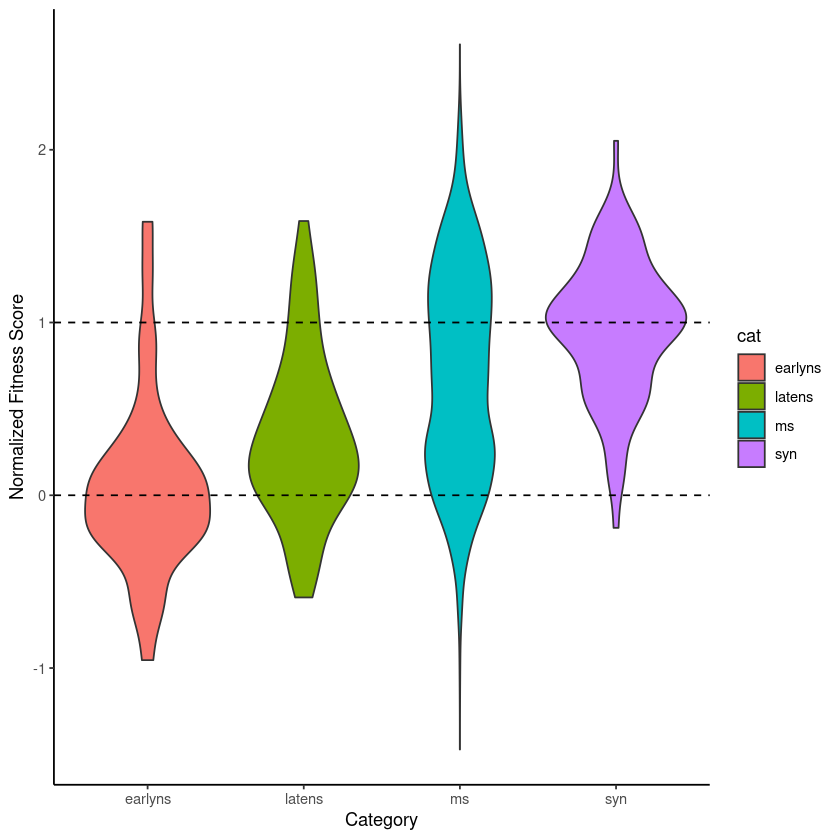

In [68]:
ggplot(scores,aes(cat,norm.ou, fill=cat))+geom_violin()+theme_classic()+
    geom_hline(yintercept = c(0,1), lty=2)+xlab("Category")+ylab("Normalized Fitness Score")

In [69]:
`%ni%` <- Negate(`%in%`)

`geom_smooth()` using formula 'y ~ x'



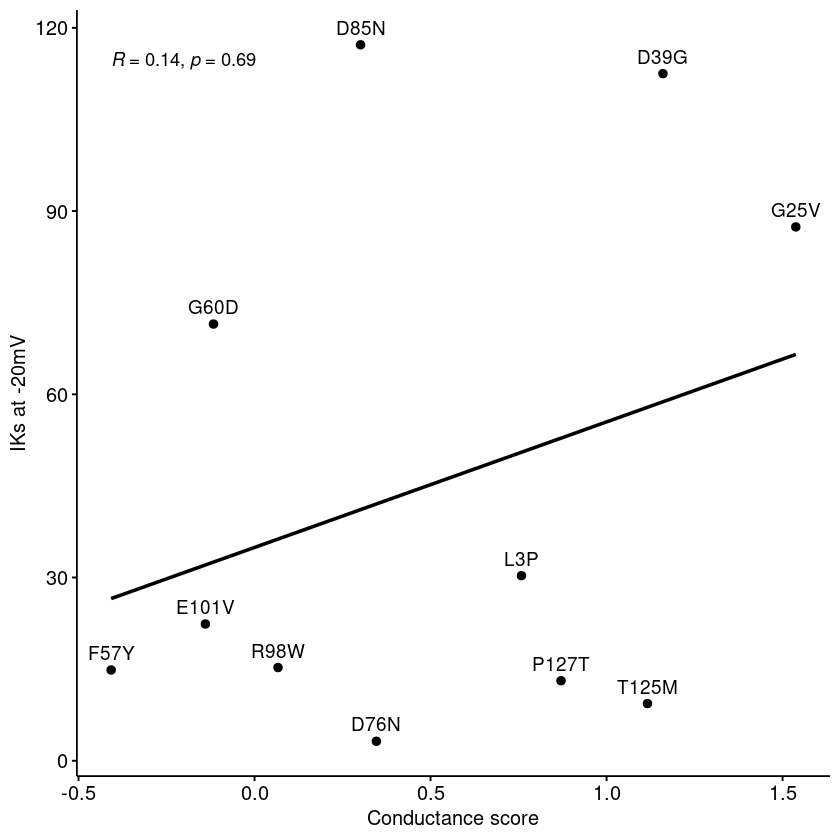

In [70]:
ggscatter(comp[comp$cat=="ms",], x="norm.ou",y="I0", 
          add = "reg.line", conf.int = FALSE, label="mutation",
          cor.coef = TRUE, cor.method = "spearman",
          xlab = "Conductance score", ylab = "IKs at -20mV")

`geom_smooth()` using formula 'y ~ x'



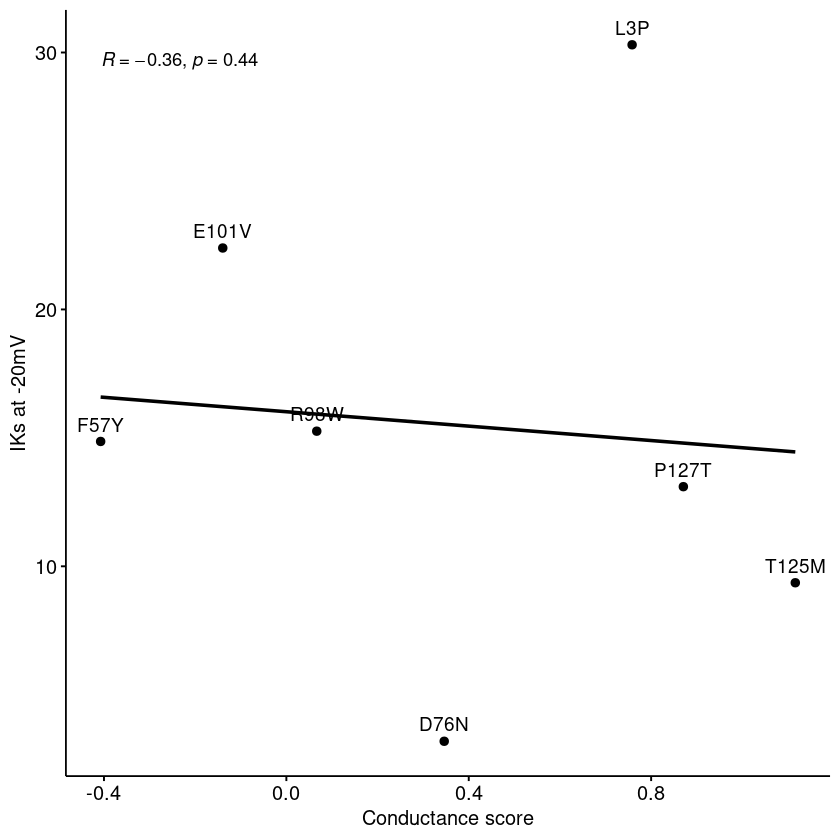

In [71]:
ggscatter(comp[comp$cat=="ms" & comp$mutation %ni% c("G60D","G25V","D39G","D85N"),], x="norm.ou",y="I0", 
          add = "reg.line", conf.int = FALSE, label="mutation",
          cor.coef = TRUE, cor.method = "spearman",
          xlab = "Conductance score", ylab = "IKs at -20mV")

In [72]:
manual

mutation,I.20,I0,I20,cell
<chr>,<dbl>,<dbl>,<dbl>,<chr>
WT,15.89,48.56,92.10,HEK
I61X,0.00,0.03,0.01,HEK
G25V,34.78,87.40,156.10,HEK
G60D,28.49,71.50,114.90,HEK
D76N,0.18,3.19,10.10,HEK
G55X,0.18,0.19,0.20,HEK
F57Y,2.54,14.86,48.78,HEK
R98W,4.73,15.26,31.72,HEK
D85N,32.30,117.22,215.59,CHO


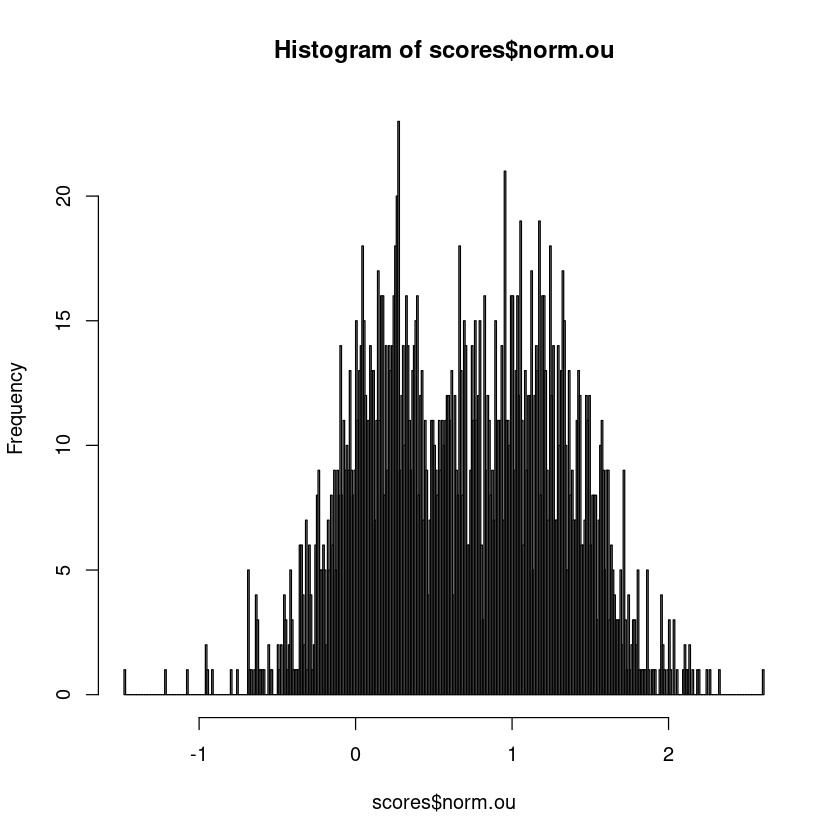

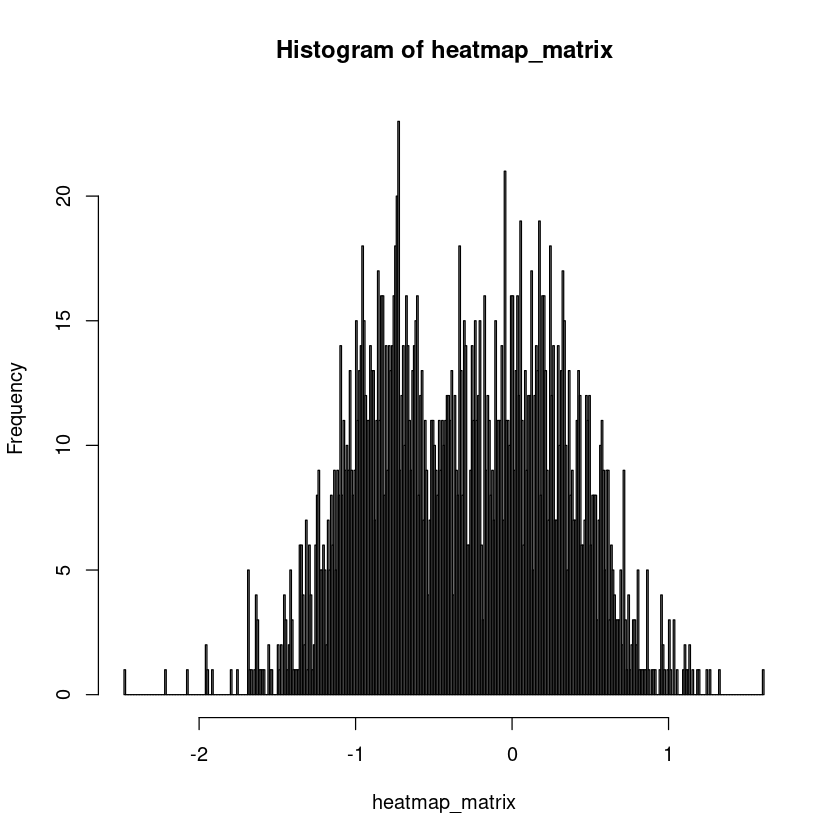

In [73]:
hist(scores$norm.ou, breaks=500)
hist(heatmap_matrix, breaks=500)

In [76]:
head(heatmap_matrix)

G,A,V,L,M,I,F,Y,W,S,...,C,P,N,Q,K,R,H,D,E,X
-1.1331855,-0.254062487,-0.1358126,-0.1273472,NA,0.3317773,-0.65068719,NA,-1.09768202,NA,...,NA,-1.3561320,NA,NA,-0.4313731,-1.0567823,NA,-0.23653835,-0.90666814,-1.1676085
-0.2627089,-0.001489906,-0.7220700,0.6613810,-0.0009042954,-0.9486267,-0.09628253,NA,NA,-0.33448842,...,NA,-0.9507647,0.10267263,0.3984593,NA,-0.3339807,NA,0.05014051,0.05791623,-1.2360955
-0.3291629,0.378388643,0.3321908,-0.5337418,-1.6402707361,NA,0.31293011,0.48896148,0.12423611,1.03544939,...,NA,-0.2417295,0.76330549,-0.3348669,0.2481263,0.2407730,-0.5859825,-0.40579387,-0.34795385,NA
-0.7398876,0.602673251,0.2661918,1.1320928,0.0366659104,0.4367598,-0.03971673,-1.40500253,-1.34626449,-0.75962585,...,0.5342433,0.5431455,0.50937001,0.4254795,-0.2362711,0.7653521,0.4246534,0.61669848,-0.61253975,-0.7856269
-0.5752086,NA,0.3049238,0.5887513,-1.0997421118,-0.3229280,0.23645441,-0.04083532,0.05896977,-0.47838046,...,NA,NA,0.15377369,NA,-1.3323348,0.6919619,-0.3874131,-0.29799262,-0.29525160,NA
-0.8076684,0.380646027,NA,0.4247560,0.5673603752,NA,NA,0.28538180,-1.54099401,-0.00444596,...,NA,-0.1575357,-0.04611545,-0.2224941,0.6284399,0.7481821,NA,NA,NA,NA


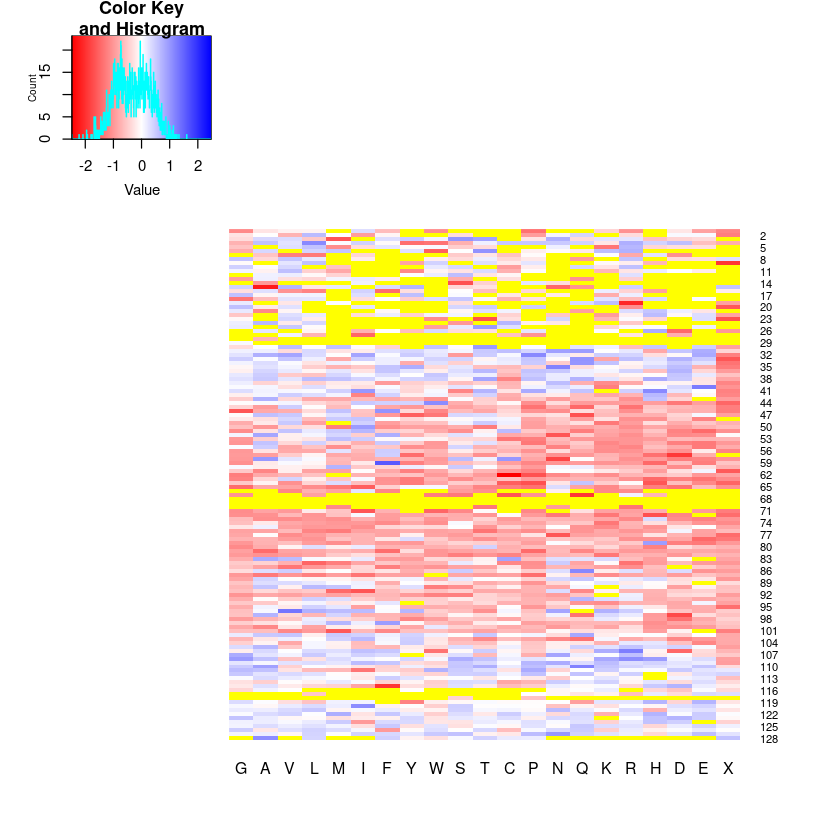

In [78]:
heatmap.2(heatmap_matrix, Rowv=NA, Colv=NA, 
        scale="none",
         sepcolor="black",
          sepwidth=c(0.5,0.5),
          trace="none", dendrogram = c("none"),
        srtCol=0, adjCol = c(0.5,1), na.color = "YELLOW", col = my_palette)

In [79]:
heatmap_matrix[60,]


G           A           V           L           M           I 
 0.05451236 -0.17771481 -0.14182508 -0.19437456  0.72223007 -0.52919007 
          F           Y           W           S           T           C 
-0.41934770  0.17684625 -0.07338039  0.50569958  0.03197075 -0.60917722 
          P           N           Q           K           R           H 
-0.97670168  0.07840467  0.16804864 -0.61877086 -0.67128891 -0.70683511 
          D           E           X 
-1.11661220 -0.30059658 -0.74865402

In [82]:
labs=matrix(nrow=128,,ncol=21)
colnames(labs)= c("G","A","V","L","M","I","F","Y","W","S","T","C","P","N","Q","K","R","H",
                 "D","E","X")


KCNE1 = "MILSNTTAVTPFLTKLWQETVQQGGNMSGLARRSPRSGDGKLEALYVLMVLGFFGFFTLGIMLSYIRSKKLEHSNDPFNVYIESDAWQEKDKAYVQARVLESYRSCYVVENHLAIEQPNTHLPETKPSP"

KCNE1 = unlist(strsplit(KCNE1,""))

for (i in 1:(length(KCNE1)-1)){
    for (x1 in (1:21)){
      a = colnames(heatmap_matrix)[x1]
        if (KCNE1[i] == a){
             labs[i,x1] = "."    
        }
   }
}
#my_palette <- colorRampPalette(c("darkred","red","pink","white","blue"))(n=200)
head(labs)


pdf("fitness_v1.pdf",useDingbats = F)

heatmap.2(heatmap_matrix, Rowv=NA, Colv=NA, 
        scale="none",
         sepcolor="black",
          sepwidth=c(0.5,0.5),
          trace="none", dendrogram = c("none"),
        srtCol=0, adjCol = c(0.5,1), na.color = "YELLOW", col = my_palette,          
          cellnote=labs, notecol="black")

dev.off()

G,A,V,L,M,I,F,Y,W,S,...,C,P,N,Q,K,R,H,D,E,X
NA,NA,NA,NA,.,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,.,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,.,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,.,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,.,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


png 
  2

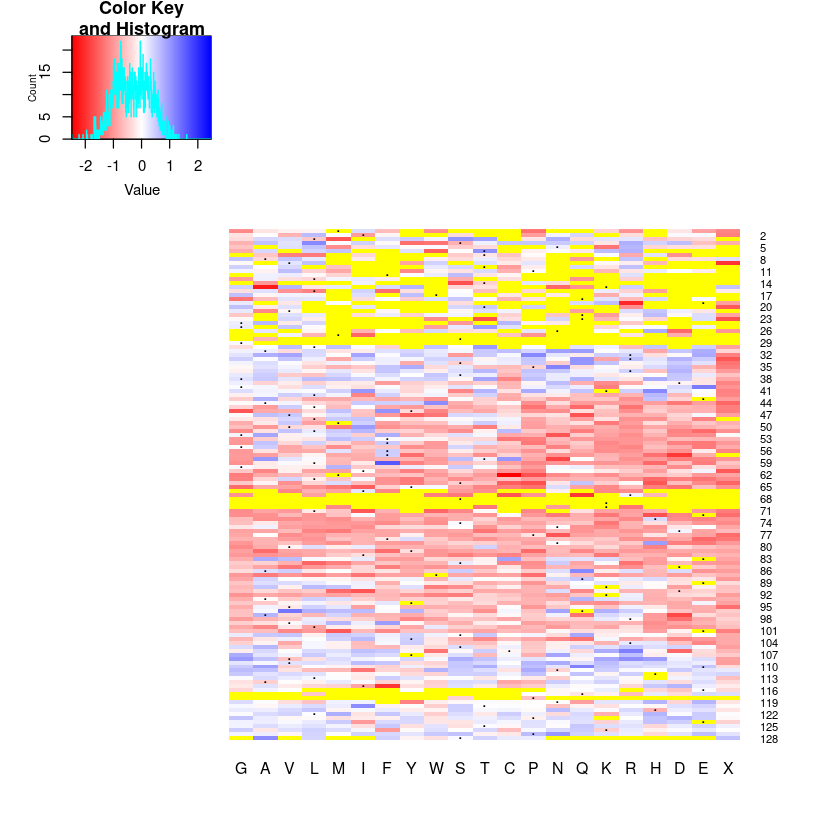

In [83]:
heatmap.2(heatmap_matrix, Rowv=NA, Colv=NA, 
        scale="none",
         sepcolor="black",
          sepwidth=c(0.5,0.5),
          trace="none", dendrogram = c("none"),
        srtCol=0, adjCol = c(0.5,1), na.color = "YELLOW", col = my_palette,          
          cellnote=labs, notecol="black")


In [222]:
head(df1)

bc,time1,time2,time3,Count_4564,Count_5013,totalCount,mut,time1.adj,time2.adj,time3.adj,tot.adj
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
CCATGATTTCTGTGTTCG,5,1295,650,1978,2603,4581,K135V,0.02281612,8.295318,4.33435601,11.731538
CAAATGCCAATTACGCAT,599,1524,188,1133,1300,2433,NA,2.73337097,9.762213,1.25362912,6.230699
GTCTATGCCGCAAGGGTT,4775,1407,2345,5394,4227,9621,NA,21.78939295,9.012751,15.63702284,24.638535
TCCGAGCCCAGAAGTAAA,810,1032,3177,603,351,954,R45H,3.69621116,6.610632,21.18499853,2.443110
CCGCCATGGGGGTATCGC,1164,395,6,522,706,1228,NA,5.31159233,2.530232,0.04000944,3.144800
ACTTTAACACGAAGCGTG,3,698,5,529,602,1131,S83F,0.01368967,4.471145,0.03334120,2.896392


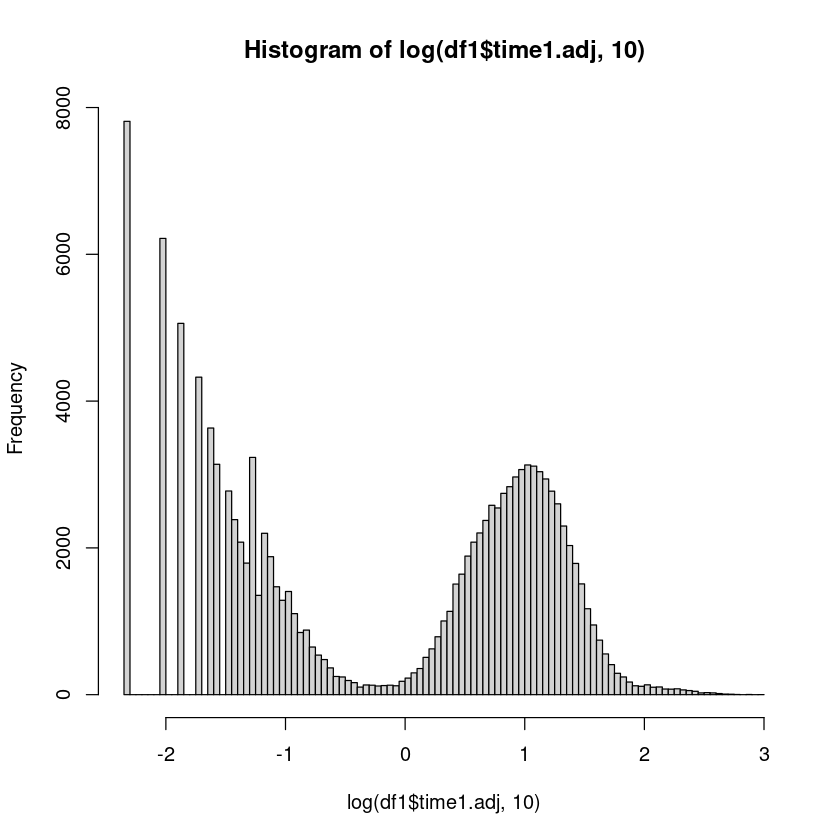

In [181]:
hist(log(df1$time1.adj,10),breaks=100)

In [182]:
nrow(df1[df1$time1.adj>1,])

[1] 64202

In [252]:
head(df3)

,orig,pos,new,time1.adj,time2.adj,time3.adj,tot.adj,mutation,cat,score.time1.total,score.time2.total,score.time3.total,pos_corr,norm.ou
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,102,A,267.19956,219.56651,251.5860,411.8100,A102A,syn,-0.60566842,-0.877681200,-0.6893079,93,0.9631843
2,A,102,C,110.51671,189.94037,164.6789,180.5289,A102C,ms,-0.66077688,0.069559697,-0.1253051,93,0.5384346
3,A,102,D,156.62353,258.35273,211.7833,190.8212,A102D,ms,-0.26931977,0.418218681,0.1432389,93,0.3361945
4,A,102,E,82.02395,81.96031,178.0153,134.5759,A102E,ms,-0.65174617,-0.652744168,0.3790230,93,0.1586258
5,A,102,F,655.88583,338.09668,375.2285,336.1632,A102F,ms,0.94382228,0.008035509,0.1542620,93,0.3278930
6,A,102,G,454.71611,409.61578,591.6196,475.3155,A102G,ms,-0.06257335,-0.209854084,0.3099285,93,0.2106607


In [179]:
traffic <- fread("/scratch2/muhama1/6436-AM/allreps-norm-postQC-dist-2022-01-13_withCI.txt",
                header=T, stringsAsFactors=F)

In [254]:
head(traffic)

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants,CI_lower,CI_upper
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>
A,8,C,missense,1.2384096,1.576771,1.3700425,1.3950743,0.1705639,3,0.09847511,A8C,1.2020631,1.588086
A,8,E,missense,1.0225342,0.559338,1.5492353,1.0437025,0.4952880,3,0.28595468,A8E,0.4832314,1.604174
A,8,G,missense,0.7998634,1.118084,1.1553984,1.0244485,0.1953892,3,0.11280803,A8G,0.8033447,1.245552
A,8,S,missense,0.8215317,0.887796,1.0392568,0.9161949,0.1116061,3,0.06443582,A8S,0.7899007,1.042489
A,8,T,missense,0.6952661,1.037872,0.9376089,0.8902492,0.1761448,3,0.10169725,A8T,0.6909226,1.089576
A,8,W,missense,1.1458088,1.199093,0.8787825,1.0745613,0.1716298,3,0.09909051,A8W,0.8803439,1.268779


In [290]:
names(traffic)

[1] "orig"       "pos_corr"   "new"        "cat_ns"     "trans_repA"
 [6] "trans_rep2" "trans_rep3" "trans_av"   "sd_av"      "count"     
[11] "sem"        "variants"   "CI_lower"   "CI_upper"   "mutation"

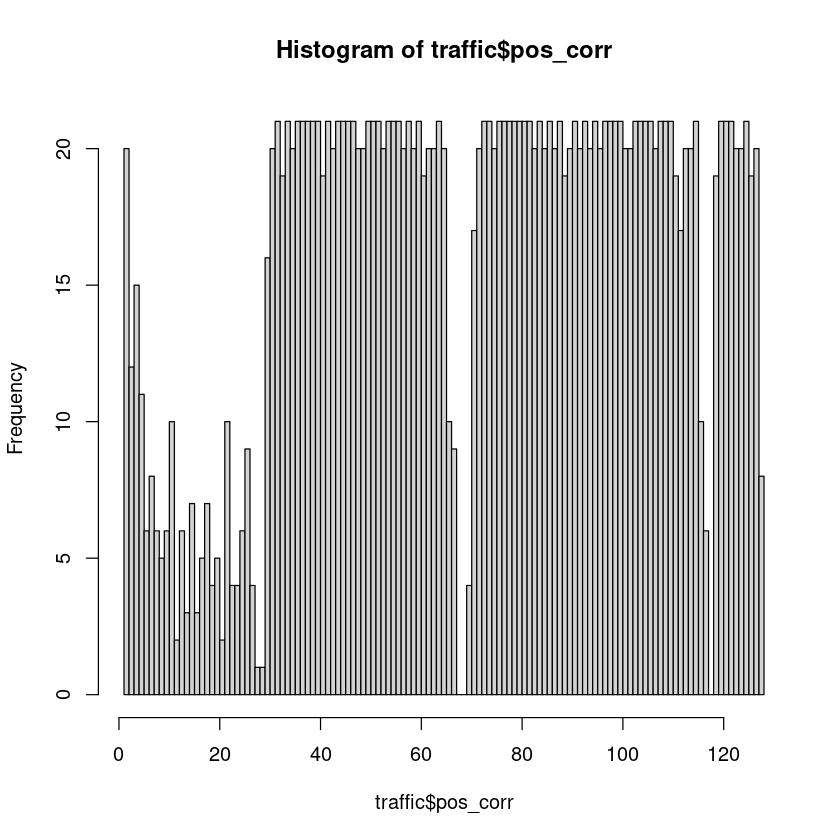

In [180]:
hist(traffic$pos_corr, breaks=129)
# pos_corr for traffic is correct 

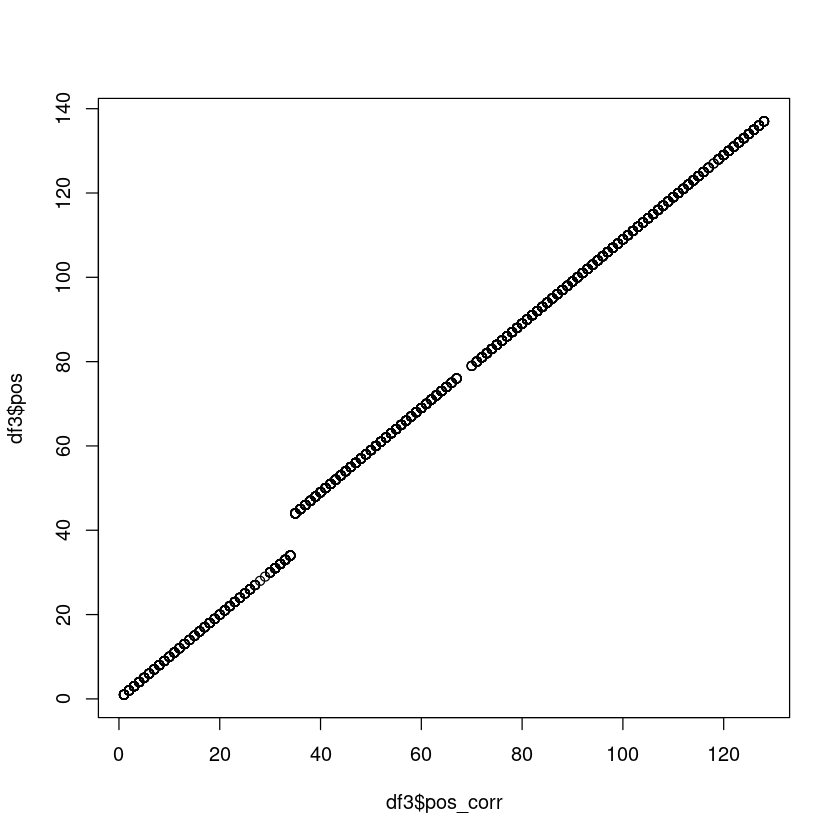

In [181]:
plot(df3$pos~df3$pos_corr)

In [182]:
df3$mutation = paste(df3$orig, df3$pos_corr, df3$new, sep="")

In [183]:
traffic$mutation = paste(traffic$orig,traffic$pos_corr,traffic$new,sep="")

In [184]:
head(traffic)

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants,CI_lower,CI_upper,mutation
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
A,8,C,missense,1.2384096,1.576771,1.3700425,1.3950743,0.1705639,3,0.09847511,A8C,1.2020631,1.588086,A8C
A,8,E,missense,1.0225342,0.559338,1.5492353,1.0437025,0.4952880,3,0.28595468,A8E,0.4832314,1.604174,A8E
A,8,G,missense,0.7998634,1.118084,1.1553984,1.0244485,0.1953892,3,0.11280803,A8G,0.8033447,1.245552,A8G
A,8,S,missense,0.8215317,0.887796,1.0392568,0.9161949,0.1116061,3,0.06443582,A8S,0.7899007,1.042489,A8S
A,8,T,missense,0.6952661,1.037872,0.9376089,0.8902492,0.1761448,3,0.10169725,A8T,0.6909226,1.089576,A8T
A,8,W,missense,1.1458088,1.199093,0.8787825,1.0745613,0.1716298,3,0.09909051,A8W,0.8803439,1.268779,A8W


In [193]:
df4 <- full_join(scores,traffic, by="mutation")

In [194]:
nrow(df4)

[1] 2262

In [195]:
names(df3)

print("")
names(traffic)

[1] "orig"              "pos"               "new"              
 [4] "time1.adj"         "time2.adj"         "time3.adj"        
 [7] "tot.adj"           "mutation"          "cat"              
[10] "score.time1.total" "score.time2.total" "score.time3.total"
[13] "pos_corr"          "norm.ou"

[1] ""


[1] "orig"       "pos_corr"   "new"        "cat_ns"     "trans_repA"
 [6] "trans_rep2" "trans_rep3" "trans_av"   "sd_av"      "count"     
[11] "sem"        "variants"   "CI_lower"   "CI_upper"   "mutation"

In [187]:
head(df4)
# pos variable is unadjusted in the functional database

,orig.x,pos,new.x,time1.adj,time2.adj,time3.adj,tot.adj,mutation,cat,score.time1.total,...,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants,CI_lower,CI_upper
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>
1,A,102,A,267.19956,219.56651,251.5860,411.8100,A93A,syn,-0.60566842,...,0.9124303,1.0000000,0.9742561,0.9622288,0.04500672,3,0.02598464,A93A,0.9112989,1.0131587
2,A,102,C,110.51671,189.94037,164.6789,180.5289,A93C,ms,-0.66077688,...,0.7904929,0.9111644,0.8888331,0.8634968,0.06420159,3,0.03706681,A93C,0.7908459,0.9361478
3,A,102,D,156.62353,258.35273,211.7833,190.8212,A93D,ms,-0.26931977,...,1.1175523,1.1835996,1.2056765,1.1689428,0.04585398,3,0.02647381,A93D,1.1170541,1.2208315
4,A,102,E,82.02395,81.96031,178.0153,134.5759,A93E,ms,-0.65174617,...,1.1919076,1.2280497,1.2715515,1.2305029,0.03987861,3,0.02302393,A93E,1.1853760,1.2756298
5,A,102,F,655.88583,338.09668,375.2285,336.1632,A93F,ms,0.94382228,...,0.6853940,0.5292791,0.7762455,0.6636396,0.12491216,3,0.07211807,A93F,0.5222881,0.8049910
6,A,102,G,454.71611,409.61578,591.6196,475.3155,A93G,ms,-0.06257335,...,0.9873479,1.0731725,0.9807619,1.0137608,0.05155734,3,0.02976664,A93G,0.9554182,1.0721034


In [272]:
colnames(df4)

[1] "orig.x"            "pos"               "new.x"            
 [4] "time1.adj"         "time2.adj"         "time3.adj"        
 [7] "tot.adj"           "mutation"          "cat"              
[10] "score.time1.total" "score.time2.total" "score.time3.total"
[13] "pos_corr.x"        "norm.ou"           "orig.y"           
[16] "pos_corr.y"        "new.y"             "cat_ns"           
[19] "trans_repA"        "trans_rep2"        "trans_rep3"       
[22] "trans_av"          "sd_av"             "count"            
[25] "sem"               "variants"          "CI_lower"         
[28] "CI_upper"

In [189]:
head(df4$cat)
head(df4$cat_ns)

[1] "syn" "ms"  "ms"  "ms"  "ms"  "ms"

[1] "synonymous" "missense"   "missense"   "missense"   "missense"  
[6] "missense"

In [196]:
df4_ms <- df4[df4$cat=="ms",]

Warning message:
“Removed 178 rows containing missing values (geom_point).”


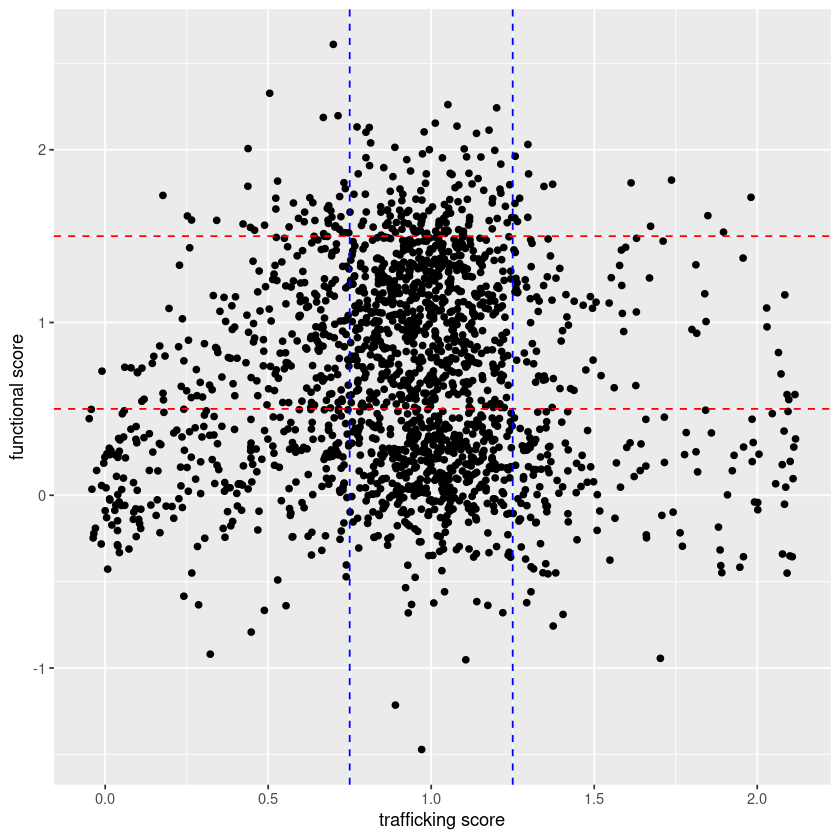

In [201]:
ggplot(df4_ms,aes(trans_av,norm.ou))+geom_point()+xlab("trafficking score")+
    ylab("functional score")+geom_hline(yintercept = c(0.5,1.5),col="red",lty=2)+
        geom_vline(xintercept = c(0.75,1.25),col="blue",lty=2)

In [311]:
fileName = paste("funcscores-rep1-norm-",Sys.Date(),".txt",sep="")
fwrite(df3,fileName, quote = F, row.names = F, sep ="\t")
rm(fileName)

In [309]:
colnames(df4_ms)

[1] "orig.x"            "pos"               "new.x"            
 [4] "time1.adj"         "time2.adj"         "time3.adj"        
 [7] "tot.adj"           "mutation"          "cat"              
[10] "score.time1.total" "score.time2.total" "score.time3.total"
[13] "pos_corr.x"        "norm.ou"           "orig.y"           
[16] "pos_corr.y"        "new.y"             "cat_ns"           
[19] "trans_repA"        "trans_rep2"        "trans_rep3"       
[22] "trans_av"          "sd_av"             "count"            
[25] "sem"               "variants"          "CI_lower"         
[28] "CI_upper"

Warning message:
“Removed 178 rows containing missing values (geom_point).”


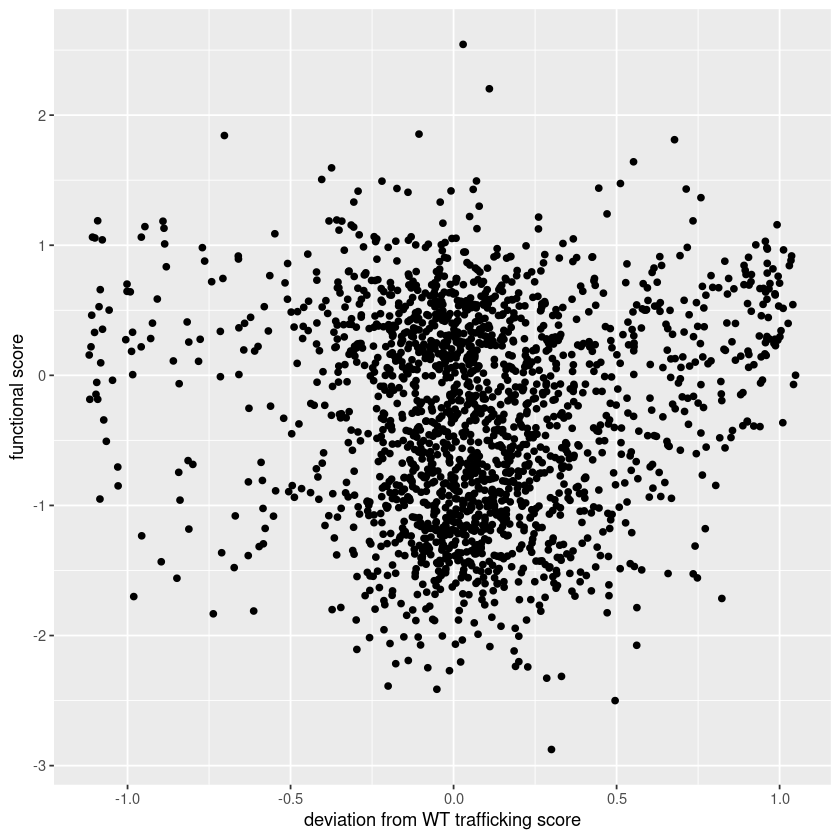

In [308]:
ggplot(df4_ms,aes(1-trans_av,score.time3.total))+geom_point()+xlab("deviation from WT trafficking score")+
    ylab("functional score")